# Economic Outlook Sentiment Analysis (Jan 2023)

## Investment outlook in the month of January 2023,

Some of the companies are: JP Morgan, Credit Suisse investment outlook whitepapers to see

In [2]:
#Install python packages necessary:
!pip install PyPDF2
!pip install textract
!pip install autocorrect
!pip install vaderSentiment
!pip3 install TextBlob
!pip3 install wordcloud

In [5]:
ls

2023-apollo-economic-and-capital-markets-outlook-white-paper.pdf
2023-outlook-report_ADA.pdf
2209270_cs_io_2023_en_rgb_digital.pdf
CIO-Insights-Outlook-2023-Resilience-versus-recession.pdf
CS_1000.csv
Final_BNYM2023OutlookMaster12_20_22.pdf
ING_global_outlook_2023_Dec_2022_OT.pdf
Investment Outlook 2023_EN.pdf
Q1 2023 Investment Outlook - Looking for the Silver Lining - Brochure.pdf
The_Year_Ahead_2023_Summary_Report.pdf
Untitled.ipynb
annual_outlook_2023.pdf
article_2023investmentoutlook_enin.pdf
bii-global-outlook-2023.pdf
csri-future-of-the-monetary-system.pdf
mi-investment-outlook-ce-en.pdf
nltk.ipynb
outlookwealthreport2023.pdf
panorama-end-year-2022.pdf
report.pdf


In [3]:
import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


In [103]:
filename = 'ubs.pdf'
open_filename = open(filename, 'rb')

ms = PyPDF2.PdfReader(open_filename)

In [104]:
ms

In [105]:
#ms.getDocumentInfo()

total_pages = len(ms.pages)
total_pages

14

In [106]:
import textract   

In [107]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ms.pages[count]
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extract_text()

In [108]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' )    

In [109]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/stephenkim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [110]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)


abfor marketing purposes for professional / qualified / institutional clients and investors only panorama investing in 2023 | ubs asset managementpanorama investing in 2023 | ubs asset management investing through change picture the opportunities 01 | calm waters turn choppy 02 | impact of a longer late cycle 14 | a new paradigm for equity long- short alpha ? 16 | central bank policy outlook for marketing purposes for global professional / qualified / institutional clients and investors and us retail clients and investors . panorama mid-year outlook 2022 | ubs asset management inflation : rising to the challenge 02 | the end of the ‘ nice ’ years 04 | high inflation = lower growth 12 | climate transition and value investing 18 | hedge funds as a diversifier in this edition of panorama , our investment experts recap on the past investment year and explore where the challenges , opportunities and surprises might spring from . the following pages offer distinct viewpoints and investment i

4. Clean our to_lower_case text variable and return it as a list of keywords.¶
From the printed text, it's apparent that our text contains unwanted characters such as spaces, punctuations \n and so forth.

Lets break our text phrases into individual words using word_tokenize() function from the Naturalge Toolkit (nltk).

In [111]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [112]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [113]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stephenkim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/stephenkim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [125]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)

abfor marketing purpose professional qualified institutional client investor panorama investing ubs asset managementpanorama investing ubs asset management investing change picture opportunity calm water turn choppy impact longer late cycle new paradigm equity short alpha central bank policy outlook marketing purpose global professional qualified institutional client investor u retail client investor panorama outlook ubs asset management inflation rising challenge end nice year high inflation lower growth climate transition value investing hedge fund diversifier edition panorama investment expert recap past investment year explore challenge opportunity surprise might spring following page offer distinct viewpoint investment insight across global capability additional content previous edition panorama including video additional investment insight visit scan qr code publishing information panorama released ubs asset management editorial deadline november editor claire evans editor melani

In [126]:
import pandas as pd


In [127]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['ubs']
df

,script
ubs,abfor marketing purpose professional qualified...


In [128]:
df

,script
ubs,abfor marketing purpose professional qualified...


In [131]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [132]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

/Users/stephenkim/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abandoned,abfor,ability,able,abn,abroad,absolute,absorb,absorber,acceleration,...,yellen,yield,yieldbloomberg,yielding,yoy,yr,ytd,zealand,zero,zurich
ubs,1,1,1,2,1,1,2,1,2,1,...,2,57,2,5,4,4,4,2,1,1


In [133]:
data = data_vect_feat.transpose()
data

,ubs
abandoned,1
abfor,1
ability,1
able,2
abn,1
...,...
yr,4
ytd,4
zealand,2
zero,1


6. Getting the top 100 frequent words from the manifesto.
We will try to get the top most common 100 words from our document and plot that into a wordcloud for visualization.

In [134]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the outlook
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))

key ubs, value [('global', 79), ('yield', 57), ('return', 56), ('asset', 51), ('market', 50), ('inflation', 49), ('year', 47), ('income', 45), ('investor', 45), ('rate', 40), ('bank', 38), ('portfolio', 37), ('bond', 36), ('investment', 35), ('document', 33), ('ubs', 32), ('index', 32), ('fixed', 30), ('equity', 29), ('central', 29), ('chart', 27), ('high', 26), ('higher', 25), ('security', 25), ('source', 24), ('financial', 23), ('growth', 23), ('policy', 21), ('level', 21), ('information', 20), ('outlook', 19), ('real', 19), ('bloomberg', 19), ('expected', 18), ('total', 18), ('credit', 17), ('management', 17), ('negative', 17), ('performance', 16), ('government', 16), ('data', 16), ('october', 16), ('china', 16), ('debt', 16), ('future', 15), ('class', 15), ('usd', 15), ('different', 15), ('wage', 14), ('fund', 14), ('aggregate', 14), ('price', 14), ('economy', 14), ('risk', 14), ('likely', 14), ('end', 13), ('fed', 13), ('positive', 13), ('time', 13), ('labor', 13), ('tr', 12), ('p

In [135]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each comedian
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:10])

['global', 'yield', 'return', 'asset', 'market', 'inflation', 'year', 'income', 'investor', 'rate']


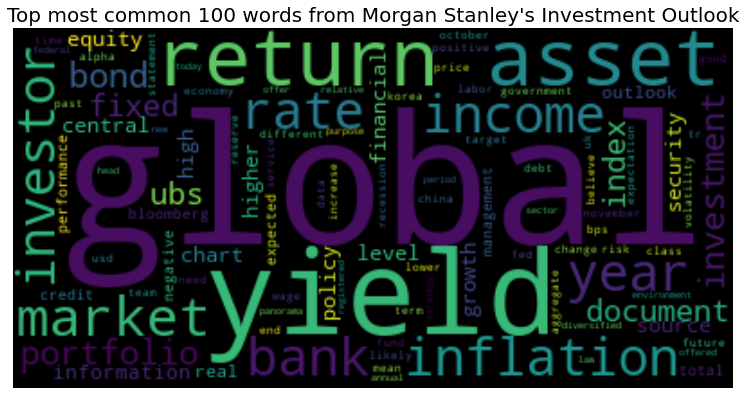

In [136]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
# img1 = imageio.imread("MS.jpeg")
# hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Morgan Stanley's Investment Outlook",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('Manifesto_top_100.jpeg')

7. Sentiment Analysis of the Manifesto
This is a set of Natural Language Processing (NLP) technique of analysing, identifying and categorizing opinions expressed in a piece of text, in order to determine whether the writer's attitude towards a particular topic, product, politics, services, brands etc. is positive, negative, or neutral. This data holds immense value in the fields of marketing analysis, public relations, product reviews, net promoter scoring, product feedback, and customer service, for example.

In [137]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

Lets decide which model we should use, between TextBlob and VADER for analysis of our text. We will therefore use TextBlob for its simplcity, and since VADER is specifically for analysis of social media data.

7.1 TextBlob function - returns two properties
Polarity: a float value which ranges from [-1.0 to 1.0] where 0 indicates neutral, +1 indicates most positive statement and -1 rindicates most negative statement.

Subjectivity: a float value which ranges from [0.0 to 1.0] where 0.0 is most objective while 1.0 is most subjective. Subjective sentence expresses some personal opinios, views, beliefs, emotions, allegations, desires, beliefs, suspicions, and speculations where as objective refers to factual information.

In [138]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.07458195623008275, subjectivity=0.39191181216649557)

We can see that the polarity is 0.09 which means that the document is neutral and 0.41 subjectivity refers almost factual information in the document rather than public opinions, beliefs and so forth.
apollo. 0.086p, 0.4144s
ubs: 0.07458p, 0.3919s

